In [80]:
%reset -f
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as st
import scipy.special as spec
from scipy import signal
import matplotlib as mpl
from matplotlib.colors import LogNorm
from matplotlib.ticker import FormatStrFormatter
import matplotlib.cm as cm
import scipy.integrate as integrate
import time 

import sys
sys.path.append('./PyRADISEgit')
from plot_configuration import *


# from PySSD import  Distribution, Detuning, Integrator
from PySSD.Distribution import Distribution,Gaussian
from PySSD.Detuning import LinearDetuning
from PySSD.Integrator import Integrator

from PyRADISE import PySSDHelper
from PyRADISE.Coefficients import calc_LandauDampedOneMode
import PyRADISE.L2D2_functions as L2D2

flag_presentation= True
if flag_presentation:
    None

# # Constants
# pi2 = 2*np.pi
# pi = np.pi

# # Set style of plots
# ticksize= 14
# titlesize = 18
# mpl.rcParams.update({'font.size':ticksize }) 
# mpl.rcParams.update({'legend.fontsize':ticksize })# legend
# mpl.rcParams.update({'ytick.labelsize':ticksize })
# mpl.rcParams.update({'xtick.labelsize':ticksize})
# mpl.rcParams.update({'axes.titlesize':titlesize})       # Title
# mpl.rcParams.update({'axes.labelsize':titlesize})    # x,y,cbar labels
# mpl.rcParams.update({'figure.titlesize' :titlesize})
# mpl.rcParams.update({'savefig.bbox':'tight'})
# mpl.rcParams.update({'axes.formatter.limits':[-4,4]})
# mpl.rcParams.update({'figure.figsize':[6,5]})
# mpl.rcParams.update({'mathtext.fontset':'cm'})
# mpl.rcParams.update({'font.style':'normal'})
# # mpl.interactive(True)


# mpl.rcParams.update({'axes.formatter.useoffset':False})   # no offset of axis
# mpl.rcParams.update({'axes.formatter.use_mathtext':True}) # Change from 1e4 to 10^4 

# #mpl.style.use('classic')
# #mpl.style.use('default')

# def sci_not(num,dec):
#     exp = int(np.log10(num)+100)-100
#     sci = (r"$%.10f"%(num/10**exp))[:dec+2+1*(dec>0)]+r"\cdot10^{%d}$"%exp
#     return sci


In [2]:
%matplotlib notebook
pi2 = 2*np.pi

<IPython.core.display.Javascript object>


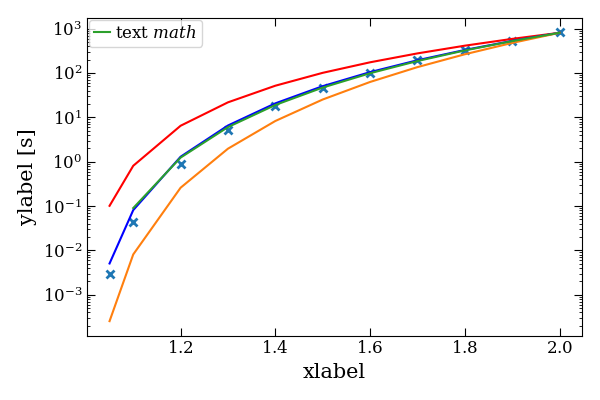

In [3]:
athresh=1
octuAs2 = np.arange(1,2.01,0.1)*athresh
octuAs2[0]*=1.05
#PyRADISE not including eta=0.937, N=1e-4
PyRADISE_noise=5e-5
latPyRADISE = np.array([.63e-3,9.74e-3,0.2,1.14,3.98,10.36,22.39,0.71*60,1.23*60,1.98*60,3.02*60])/0.937**2/(PyRADISE_noise/1e-4)**2

widths = np.array([ np.nan,-1.430e-06 ,-3.025e-06 ,-4.757e-06 ,-6.606e-06 ,-8.554e-06,
 -1.058e-05 ,-1.268e-05 ,-1.484e-05, -1.704e-05 ,-1.928e-05])

plt.figure()
plt.plot(octuAs2,latPyRADISE,'x')
plt.plot(octuAs2,810*(octuAs2-athresh)**3,'r')
plt.plot(octuAs2,810*(octuAs2-athresh)**4,'b')
plt.plot(octuAs2,810*(octuAs2-athresh)**5)
plt.plot(octuAs2,810*(widths/widths[-1])**3.5,label=r'text $math$')
plt.yscale('log')
plt.xlabel('xlabel')
plt.ylabel('ylabel [s]')
plt.tight_layout()
plt.legend(loc=0)
plt.savefig('Plots/test_layout1.2.eps')

# Modes

In [3]:
N = 1024*8
t = np.arange(N)
mux = 2*np.pi * 0.31
mus = 2*np.pi * 0.002
Qp = 10
dpp= 1e-1
x = np.cos(mux*t + Qp * dpp * np.cos(mus*t))

F,PSD = signal.welch(x)

fft = np.fft.rfft(x)
f   = np.fft.rfftfreq(N)

(0.3, 0.32)

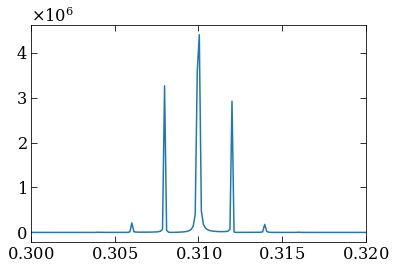

In [4]:
plt.figure()
# plt.plot(F,PSD)
plt.plot(f,np.abs(fft)**2)
plt.xlim(0.3,0.32)

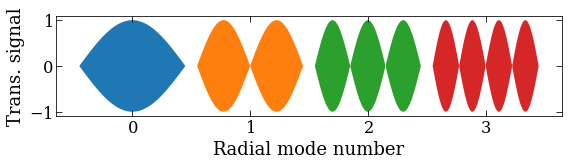

In [5]:
L=0.9
t = np.linspace(0,L,1000)
plt.figure(figsize= (8,2.3))
for m in range(4):
    f=np.sin(t/L*np.pi*(m+1))
    plt.fill_between(t+m-.5*L,f,-f)
plt.xlabel('Radial mode number')
plt.ylabel('Trans. signal')
plt.xticks(np.arange(4))
plt.tight_layout()
plt.savefig('Plots/Mode.eps')

# Multi-bunch modes

<IPython.core.display.Javascript object>


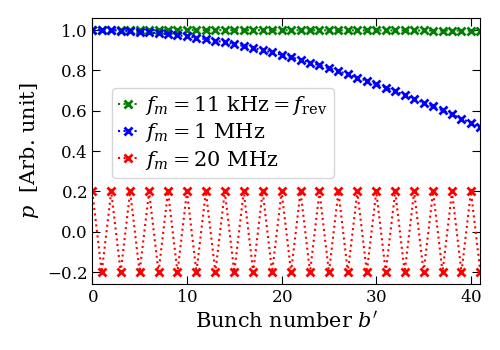

In [75]:
nb = 2**6
bs = np.arange(nb)

dt= 25e-9
Qx = 0.31
frev=11.2455e3
wb =pi2/dt
wrev = pi2*frev

wb1 = Qx * wrev
wb1 = wrev
x1 = np.cos(wb1*dt*bs)


wb2 = (3564/2-Qx)*wrev
wb2 = wb/2
x2 = .2*np.cos(wb2*dt*bs)

wb3 = 1e6
x3 = 1*np.cos(wb3*dt*bs)

plt.figure(figsize=(5,3.5))
subscript = ['\mathrm{coh}','m'][1]
# plt.plot(bs,x1,'gx:',label=r'Low-frequency mode, $f_\mathrm{coh}=11 \mathrm{kHz}=f_\mathrm{rev}$')
# plt.plot(bs,x3,'bx:',label=r'High-frequency mode, $f_\mathrm{coh}=1 \mathrm{MHz}$')
# plt.plot(bs,x2,'rx:',label=r'High-frequency mode, $f_\mathrm{coh}=20 \mathrm{MHz}$')
plt.plot(bs,x1,'gx:',label=r'$f_%s=11$ $\mathrm{kHz}=f_\mathrm{rev}$'%(subscript))
plt.plot(bs,x3,'bx:',label=r'$f_%s=1$ $\mathrm{MHz}$'%(subscript))
plt.plot(bs,x2,'rx:',label=r'$f_%s=20$ $\mathrm{MHz}$'%(subscript))
plt.xlim(0,41)

plt.legend(loc=(0.05,.4),fontsize=15)
plt.xlabel(r'Bunch number $b^\prime$')
plt.ylabel(r'$p$  [Arb. unit]')
plt.tight_layout()
plt.savefig('Plots/multibunchmodes.eps')


# Wake Diffusion Coefficient

<IPython.core.display.Javascript object>


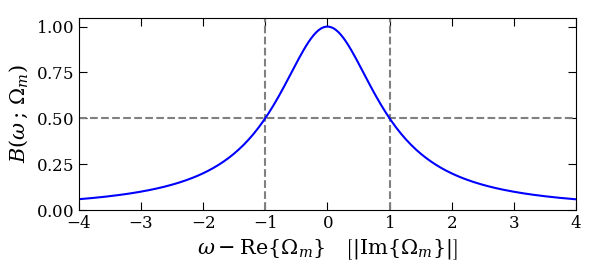

<IPython.core.display.Javascript object>


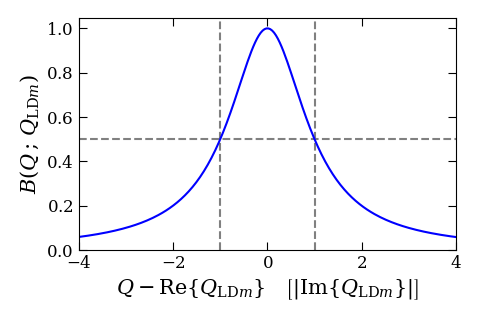

<IPython.core.display.Javascript object>


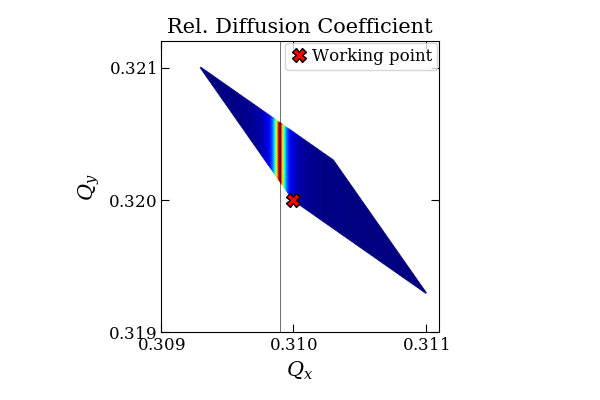

In [18]:

Rew=1000
Imw=1
Rew2=Rew**2-Imw**2
sqRew2=np.sqrt(Rew2)
nwidths=4
w = np.linspace(sqRew2-nwidths*Imw,sqRew2+nwidths*Imw,200)

B = 1/(1 + (Rew2-w**2)**2/(2*Rew*Imw)**2)

# plt.figure(figsize=(6,3))
if i_layout==1:
    plt.figure(figsize=(figwidthM,0.8*figheight))
else:
    plt.figure(figsize=(figwidth,figheight*.7))
# plt.grid(True)
widthw=[-Imw*4,+Imw*4]
plt.axvline(-Imw,c='gray',ls='--')
plt.axvline(+Imw,c='gray',ls='--')
plt.plot(widthw,[0.5,0.5],'gray',ls='--')
plt.plot(w-sqRew2,B,'b')
plt.ylim(bottom=0)
plt.xlim(-4,4)
# plt.annotate(r'$\dfrac{\Delta \omega}{2} = \mathrm{Im}\{\Omega_m\}$',xy = (0,.3),ha='center')
# plt.xlabel(r'$\omega-\sqrt{\mathrm{Re}\{\Omega_m^2\}}$   $\left[|\mathrm{Im}\{\Omega_m\}|\right]$')
plt.xlabel(r'$\omega-\mathrm{Re}\{\Omega_m\}$   $\left[|\mathrm{Im}\{\Omega_m\}|\right]$')
plt.ylabel(r'$B(\omega \,;\, \Omega_m)$')
plt.tight_layout()
plt.savefig('Plots/NoiseExcitedDiffusion_Bfunction.eps')



### Diffusion coefficient in tune
# if i_layout==1:
#     plt.figure(figsize=(figwidthM,0.8*figheight))
# else:
#     plt.figure(figsize=(figwidth,figheight*.9))
plt.figure(figsize=(figwidth*.8,figheight*.8))
# plt.grid(True)
widthw=[-Imw*4,+Imw*4]
plt.axvline(-Imw,c='gray',ls='--')
plt.axvline(+Imw,c='gray',ls='--')
plt.plot(widthw,[0.5,0.5],'gray',ls='--')
plt.plot(w-sqRew2,B,'b')
plt.ylim(bottom=0)
plt.xlim(-4,4)
# plt.annotate(r'$\dfrac{\Delta \omega}{2} = \mathrm{Im}\{\Omega_m\}$',xy = (0,.3),ha='center')
# plt.xlabel(r'$\omega-\sqrt{\mathrm{Re}\{\Omega_m^2\}}$   $\left[|\mathrm{Im}\{\Omega_m\}|\right]$')
plt.xlabel(r'$Q-\mathrm{Re}\{Q_{\mathrm{LD}m}\}$   $\left[|\mathrm{Im}\{Q_{\mathrm{LD}m}\}|\right]$')
plt.ylabel(r'$B(Q \,;\, Q_{\mathrm{LD}m})$')
plt.tight_layout()
plt.savefig('Plots/NoiseExcitedDiffusion_Bfunction_Q.eps')



### Footprint
x = np.linspace(0,10,100)
X,Y = np.meshgrid(x,x)

# r = np.linspace(0,10,100)
# phi = np.linspace(0,.5*np.pi,100)
# R,PHI = np.meshgrid(r,phi)
# X = R * np.cos(PHI)
# Y = R * np.sin(PHI)

a= 1e-4
b= -.7*a
Q = 0.31 + a*X+b*Y
Qy= 0.32 + b*X+a*Y
ReQ = 0.31-1e-4
ImQ = 3e-5

ReQ2=ReQ**2-ImQ**2
sqReQ2=np.sqrt(ReQ2)

B = 1/(1 + (ReQ2-Q**2)**2/(2*ReQ*ImQ)**2) 
plt.figure()
ax=plt.gca()
ax.set_aspect('equal')
plt.scatter(Q,Qy,c=B,marker='.',s=1,vmin=0,vmax=1)#,label='Diffusion Coefficient')
plt.axvline(np.sqrt(ReQ2),color='k',lw=0.4)
plt.plot(0.31,0.32,'X',ms=10,mew=1,lw=.1,mfc='r',mec='k',label='Working point')
plt.xlabel(r'$Q_x$')
plt.ylabel(r'$Q_y$')
plt.yticks([0.319,0.32,0.321])
plt.xticks([0.309,0.31,0.311])
plt.legend(loc=0)
plt.axis([0.309,0.3111,0.319,0.3212])
# plt.colorbar(label='Relative $D_{xx}\,/\,J_x$')
plt.title('Rel. Diffusion Coefficient')
plt.tight_layout()
plt.savefig('Plots/NoiseExcitedDiffusion_Bfunction_QxQy.pdf')

# Functions

In [4]:
# def calc_CapitalOmega(distribution,detuning,integrator_epsilon,Q0,modeDQ,tol=1e-4,
#                       flagFindalpha=[1,1],debug=0,JmaxSD=18):    
#     # Additional integrators
#     integrator1 = Integrator(distribution, detuning, maxJ=JmaxSD,epsilon=integrator_epsilon*1)
#     integrator2 = Integrator(distribution, detuning, maxJ=JmaxSD,epsilon=integrator_epsilon*2)
#     integrator4 = Integrator(distribution, detuning, maxJ=JmaxSD,epsilon=integrator_epsilon*4)
    
#     return calc_LandauDampedOneMode(integrator_epsilon,integrator1,integrator2, integrator4,Q0,modeDQ,
#                                    tol=tol,flagFindalpha=flagFindalpha,debug=debug)
#         return dampDQ , cnt, alpha, np.abs(err)/absModeDQ

# def calc_CapitalOmega(distribution,detuning,integrator_epsilon,Q0,modeDQ,tol=1e-4,
#                       flagFindalpha=[1,1],debug=0):    
    
#     absModeDQ = np.abs(modeDQ) # Absolute value of undamped mode - used to find accuracy of mode
    
#     # Additional integrators
#     integrator1 = Integrator(distribution, detuning, maxJ=18,epsilon=integrator_epsilon*1)
#     integrator2 = Integrator(distribution, detuning, maxJ=18,epsilon=integrator_epsilon*2)
#     integrator4 = Integrator(distribution, detuning, maxJ=18,epsilon=integrator_epsilon*4)
    
#     # Estimate of damped mode corresponding to free mode
#     dampDQ = modeDQ.real + 1j*integrator_epsilon
    
#     #debug
#     if debug:
#         dampDQs=[dampDQ]
#         modeDQs=[]
    
#     cnt = 0
#     err = 0
#     while True and absModeDQ>0:
#         if dampDQ.imag<=integrator_epsilon*1:
#             # Taylor approach to getting stabilized Omega
#             tempDQ = 2*integrator1.integrate(Q0+dampDQ.real) - 1*integrator2.integrate(Q0+dampDQ.real)+1j*(dampDQ.imag)
#             flag_taylor=True
#         else:
#             # Original approach to getting unstable Omega
#             integrator1._detuning += 1j*(integrator_epsilon - dampDQ.imag)
#             tempDQ=integrator1.integrate(Q0+dampDQ.real)
#             integrator1._detuning -= 1j*(integrator_epsilon - dampDQ.imag)
#             flag_taylor=False
        
#         # Calculate error
#         errold= err
#         err   = tempDQ-modeDQ

#         # Break if within tolerance
#         if np.abs(err)<absModeDQ*tol:
#             break

#         ## Update dampDQ (damped mode tune)
#         if cnt==0:
#             # Simple method
#             dDampDQ  =-(err*.5+errold*.05) 
#         else:
#             # Newton's method
#             dDampdMode = (dDampDQ)/(err-errold)
#             dDampDQ    = -err*dDampdMode 
#         dampDQ = dampDQ + dDampDQ
        
#         #debug
#         if debug or cnt>40 :
#             print("%2d:dampDQ=%11.4e + %11.4ei | err=%10.2e + %10.2ei - relerr=%.1e"%(
#                 cnt,dampDQ.real,dampDQ.imag,err.real,err.imag,np.abs(err)/absModeDQ))
#             if debug:
#                 modeDQs+=[tempDQ]
#                 dampDQs+=[dampDQ]
        
#         keep = [dampDQ.real+0j,tempDQ-1j*dampDQ.imag]
        
#         # Break if tried 50 times 
#         if cnt>50:
#             break
        
#         cnt+=1

#     # Calc alpha
#     alpha=1
#     if np.any(np.abs(flagFindalpha)>0) and flag_taylor:
#         # Calculate alpha 
#         alpha =  2j*integrator_epsilon/(
#                     integrator4.integrate(Q0+dampDQ.real)-integrator2.integrate(Q0+dampDQ.real))
#         # Use the parts of alpha as given by flagFindalpha
#         alpha = alpha.real*flagFindalpha[0] + 1j*alpha.imag*flagFindalpha[1]
#         dampDQold = dampDQ
#         dampDQ = dampDQ.real + 1j*alpha*dampDQ.imag
#         print('Found alpha!=1, alpha=%.2e %s%.2ej |  dampDQ = %.2e %s%.3ej -> %.2e %s%.3ej'%(
#                     alpha.real,['+','-'][np.sign(alpha.imag)<0],np.abs(alpha.imag),
#                     dampDQold.real,['+','-'][np.sign(dampDQold.imag)<0],np.abs(dampDQold.imag),
#                     dampDQ.real,['+','-'][np.sign(dampDQ.imag)<0],np.abs(dampDQ.imag)))
        
        
#     if debug :
#         modeDQs = np.array(modeDQs)
#         dampDQs = np.array(dampDQs[:-1])
#         print('modeDQ',modeDQs)
#         print('dampDQ',dampDQs[1:])
#     return dampDQ , alpha , cnt, np.abs(err)/absModeDQ, keep

# Stability diagram

In [10]:
# Stability diagram illustration


a = 1e-4
b = -0.7*a
integrator_epsilon = 2e-6*a/1e-4

dist = Gaussian()
detu = LinearDetuning(startTune=0.31,slopex=a,slopey=b)
integrator = Integrator(distribution=dist,detuning=detu,maxJ=18,epsilon = integrator_epsilon)

Q  = PySSDHelper.get_tune_range(detu,n_samples=100,maxJ=18)
DQs = np.zeros_like(Q,dtype=np.complex)

for i,iQ in enumerate(Q):
    DQs[i] = 2*integrator.integrate(Q[i])-integrator.integrate(Q[i]+1j*integrator_epsilon)

In [11]:
Qx=0.31
wmode_DQ = (1.+.5j)*a

dampDQ,cnt,alpha,relerr,freeDQ,sdDQ=L2D2.calc_CapitalOmega(dist,detu,integrator_epsilon,
                                          Qx,wmode_DQ,tol=1e-4,flagFindalpha=[1,1],debug=0)


Found alpha!=1, alpha=1.41e+00 +8.20e-02j |  dampDQ = 2.31e-04 -5.931e-05j -> 2.36e-04 -8.378e-05j


<IPython.core.display.Javascript object>


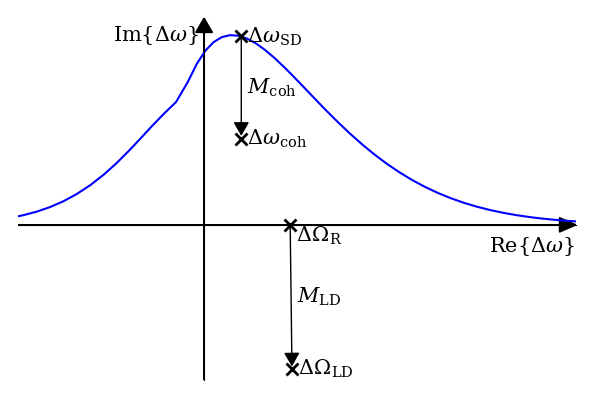

In [12]:
plt.figure(figsize=(figwidthM,figheight))
plt.plot(DQs.real/a,DQs.imag/a,'b')
va='center';ha='left'
for i,DQ in enumerate([wmode_DQ/a,dampDQ/a,sdDQ/a,freeDQ/a]):
    plt.plot(DQ.real,DQ.imag,'kx',ms=9)
    
    Qlabel = r" $\Delta \%smega_\mathrm{%s}$  "%(['o','O','o','O'][i],['coh','LD','SD','R'][i])
#     Qlabel = r" $\Delta \%smega_\mathrm{%s}$  "%(['o','O','o','O'][i],['m','m','SD','SD'][i])
    plt.annotate(Qlabel,xy=(DQ.real,DQ.imag),va=[va,'top'][i==3],ha=ha,fontsize=titlesize*1.)
    if i in [2,3]:
        dDQ =[wmode_DQ/a,dampDQ/a][i-2]-DQ
#         plt.arrow(DQ.real,DQ.imag,dDQ.real,dDQ.imag , 
#                   arrowprops=dict(arrowstyle="->"))
#                   head_width=.4,head_length=.1,overhang=0,length_includes_head=1)
        plt.annotate("",
            xytext=(DQ.real,DQ.imag), xycoords='data',
            xy=((DQ+dDQ).real,(DQ+dDQ).imag), textcoords='data',
            arrowprops=dict(arrowstyle="-|>, head_width=.4, head_length=.7",
                            connectionstyle="arc3",color='k'),
            )
        plt.annotate([r' $M_\mathrm{coh}$ ',r' $ M_\mathrm{LD}$ '][i-2],
                     xy=((DQ+.5*dDQ).real,(DQ+.5*dDQ).imag),va=va,ha=ha,fontsize=titlesize*1.)
    

plt.xlabel(r'$\mathrm{Re}\{\Delta \omega\}$',position=(.92,0))
plt.ylabel(r'$\mathrm{Im}\{\Delta \omega\}$            ',position=(0,.92),rotation=0)

ylim = [-.9,1.2]; dy=ylim[1]-ylim[0]
xlim = [-5,10]  ; dx=xlim[1]-xlim[0]
plt.arrow(0,ylim[0],0,dy,head_length=.04*dy,head_width=.03*dx,color='k',length_includes_head=1)
plt.arrow(xlim[0],0,dx,0,head_length=.03*dx,head_width=.04*dy,color='k',length_includes_head=1)
plt.ylim(ylim)
plt.xlim(xlim)

ax = plt.gca()

if 1:
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    
    ax.xaxis.set_ticks_position('none')
    ax.xaxis.set_ticklabels('')
    ax.yaxis.set_ticks_position('none')
    ax.yaxis.set_ticklabels('')

#     ax.yaxis.set_label_coords(0.1,1.02)
#     ax.yaxis.set_label_position('left')
plt.tight_layout()
plt.savefig("Plots/taylor_howToGetBigOmega.eps")


<IPython.core.display.Javascript object>


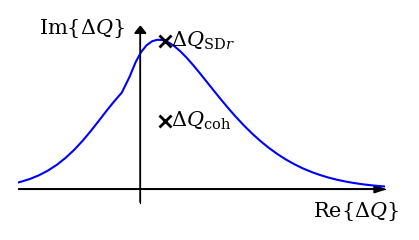

In [79]:
flag_presentation = True

if flag_presentation:
    plt.figure(figsize=(figwidth*.7,figheight*.6))
else:
    plt.figure(figsize=(figwidth*.8,figheight))
plt.plot(DQs.real/a,DQs.imag/a,'b')
va='center';ha='left'
for i,DQ in enumerate([wmode_DQ/a,dampDQ/a,sdDQ/a,freeDQ/a]):
    if i in [1,3] and flag_presentation:
        continue
    
    plt.plot(DQ.real,DQ.imag,'kx',ms=9)
    
    
    
    Qlabel = r" $\Delta Q_\mathrm{%s}$  "%(['coh','LD','SD\mathit{r}','F'][i])
#     Qlabel = r" $\Delta Q_{%s}$  "%(['\mathrm{coh}','LD','SD','F'][i])
    plt.annotate(Qlabel,xy=(DQ.real,DQ.imag),va=[va,'top'][i==3],ha=ha,fontsize=titlesize*1.)
    if i in [2,3] and not flag_presentation:
        dDQ =[wmode_DQ/a,dampDQ/a][i-2]-DQ
#         plt.arrow(DQ.real,DQ.imag,dDQ.real,dDQ.imag , 
#                   arrowprops=dict(arrowstyle="->"))
#                   head_width=.4,head_length=.1,overhang=0,length_includes_head=1)
        plt.annotate("",
            xytext=(DQ.real,DQ.imag), xycoords='data',
            xy=((DQ+dDQ).real,(DQ+dDQ).imag), textcoords='data',
            arrowprops=dict(arrowstyle="-|>, head_width=.4, head_length=.7",
                            connectionstyle="arc3",color='k'),
            )
        plt.annotate([r' $M_\mathrm{coh}$ ',r' $ M_\mathrm{LD}$ '][i-2],
                     xy=((DQ+.5*dDQ).real,(DQ+.5*dDQ).imag),va=va,ha=ha,fontsize=titlesize*1.)
    

plt.xlabel(r'$\mathrm{Re}\{\Delta Q\}$',position=(.92,0))
plt.ylabel(r'$\mathrm{Im}\{\Delta Q\}$               ',position=(0,.92),rotation=0)

ylim = [-.9,1.2]; dy=ylim[1]-ylim[0]
if flag_presentation: ylim = [-.1,1.2]; dy=ylim[1]-ylim[0]
xlim = [-5,10]  ; dx=xlim[1]-xlim[0]
plt.arrow(0,ylim[0],0,dy,head_length=.04*dy,head_width=.03*dx,color='k',length_includes_head=1)
plt.arrow(xlim[0],0,dx,0,head_length=.03*dx,head_width=.04*dy,color='k',length_includes_head=1)
plt.ylim(ylim)
plt.xlim(xlim)

ax = plt.gca()

if 1:
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    
    ax.xaxis.set_ticks_position('none')
    ax.xaxis.set_ticklabels('')
    ax.yaxis.set_ticks_position('none')
    ax.yaxis.set_ticklabels('')

#     ax.yaxis.set_label_coords(0.1,1.02)
#     ax.yaxis.set_label_position('left')
plt.tight_layout()
if flag_presentation:
    plt.savefig("Plots/taylor_howToGetDQLD_pres.eps")
else:
    plt.savefig("Plots/taylor_howToGetDQLD.eps")


## Random

<IPython.core.display.Javascript object>


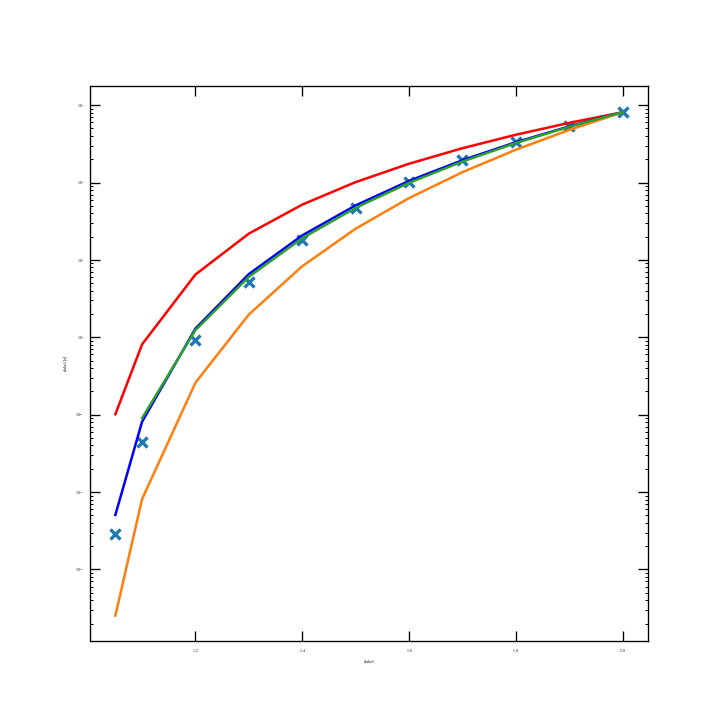

Text(0, 0.5, 'ylabel [s]')

In [4]:
athresh=1
octuAs2 = np.arange(1,2.01,0.1)*athresh
octuAs2[0]*=1.05
#PyRADISE not including eta=0.937, N=1e-4
PyRADISE_noise=5e-5
latPyRADISE = np.array([.63e-3,9.74e-3,0.2,1.14,3.98,10.36,22.39,0.71*60,1.23*60,1.98*60,3.02*60])/0.937**2/(PyRADISE_noise/1e-4)**2

widths = np.array([ np.nan,-1.430e-06 ,-3.025e-06 ,-4.757e-06 ,-6.606e-06 ,-8.554e-06,
 -1.058e-05 ,-1.268e-05 ,-1.484e-05, -1.704e-05 ,-1.928e-05])

plt.figure()
plt.plot(octuAs2,latPyRADISE,'x')
plt.plot(octuAs2,810*(octuAs2-athresh)**3,'r')
plt.plot(octuAs2,810*(octuAs2-athresh)**4,'b')
plt.plot(octuAs2,810*(octuAs2-athresh)**5)
plt.plot(octuAs2,810*(widths/widths[-1])**3.5)
plt.yscale('log')
plt.xlabel('xlabel')
plt.ylabel('ylabel [s]')
# plt.tight_layout()

<IPython.core.display.Javascript object>


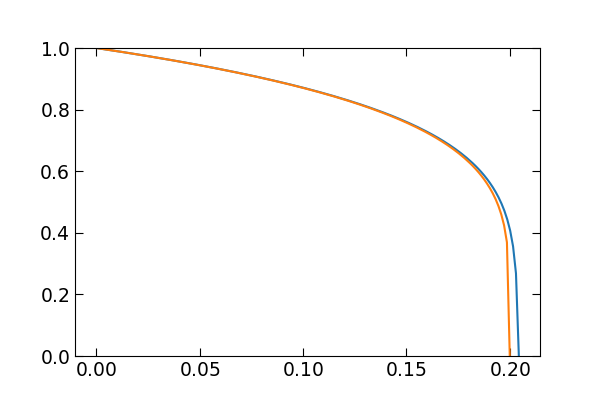

latency estimated 0.2
latency 0.2044
count 146


In [305]:
#Test of forward euler
x=x0 = -1
dt = 0.0014
xs =[x0/x0]

count=0
xsd=4.3/2
L=1/5

while x<0 and count<=1e6:
    dxdt = (1+0*(x0-x)/xsd)/x**4
    x+= dxdt*dt
    xs+=[x/x0]
    count+=1
# print(xs)
    
plt.figure()
plt.ylim(bottom=0)
ts = dt*np.arange(count+1)
plt.plot(ts,xs)
plt.plot(ts/ts[-1]*L,(1-ts/ts[-1])**(1/5))
print('latency estimated',L)
print('latency',ts[-1])
print('count',count)


## Concept of stability diagram

In [85]:

dist = Gaussian()

for j in range(2):
    a=1e-4  * [1,1.3][j]
    b=-0.7*a
    integrator_epsilon = 2e-6*a/1e-4
    
    detu = LinearDetuning(startTune=0.31,slopex=a,slopey=b)
    integrator = Integrator(distribution=dist,detuning=detu,maxJ=18,epsilon = integrator_epsilon)

    Q  = PySSDHelper.get_tune_range(detu,n_samples=100,maxJ=18)
    DQ = np.zeros_like(Q,dtype=np.complex)
    
    for i,iQ in enumerate(Q):
        DQ[i] = 2*integrator.integrate(Q[i])-integrator.integrate(Q[i]+1j*integrator_epsilon)
        
    if j==0:
        DQ1 = DQ.copy()
    else:
        DQ2 = DQ.copy()


<IPython.core.display.Javascript object>


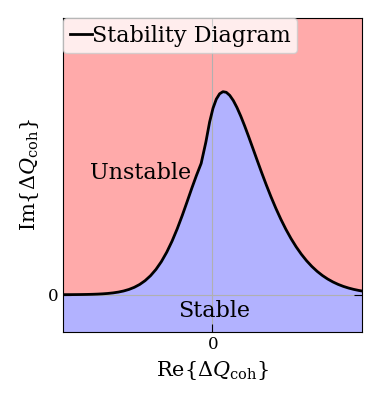

In [107]:
plt.figure(figsize=(3.8,4))
flag_time2=0
plt.grid(True)
mode1 = -1.2e-4+1j*6e-5
mode2 = mode1*0.7

flag_damped = True


plt.fill_between(np.real(DQ1),-1+0*np.imag(DQ1),np.imag(DQ1)*flag_damped,color='b',alpha=0.3)#,label='Stable')
plt.fill_between(np.real(DQ1),np.imag(DQ1)*flag_damped,1+np.imag(DQ1),color='#FFAAAA')#,alpha=0.3)#,label='Unstable')
plt.plot(np.real(DQ1),np.imag(DQ1)*flag_damped,'k',lw=2,label=r'Stability Diagram')
plt.annotate('Stable',xy=(1e-5,-1.5e-5),va='bottom',ha='center',fontsize=16)
plt.annotate('Unstable',xy=(-1.4e-4,6e-5),va='bottom',ha='right',fontsize=16)

# plt.plot(np.real(DQ1),np.imag(DQ1),'r',label=r'$\varepsilon=\varepsilon_0$')
# plt.plot(mode1.real,mode1.imag,'rx',mew=10,ms=2, label=r'$N=N_0$')

if flag_time2:
    plt.plot(np.real(DQ2),np.imag(DQ2),'b',label=r'$\varepsilon=1.3\,\varepsilon_0$')
    plt.plot(mode2.real,mode2.imag,'bx',mew=10,ms=2,label=r'$N=0.7 \,N_0$')
    
plt.xlim(-10e-4,10e-4)
plt.ylim(-0.2e-4,1.5e-4)
plt.yticks([0]) ; plt.xticks([0])
plt.legend(loc=2,borderpad=.3,borderaxespad=0,handlelength=1,handletextpad=0,fontsize=16)
plt.xlabel(r'$\mathrm{Re}\{\Delta Q_\mathrm{coh}\}$')
plt.ylabel(r'$\mathrm{Im}\{\Delta Q_\mathrm{coh}\}$')
plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=5)
plt.tight_layout()
plt.savefig('Plots/StabilityEvolution_t%d_LD%d.pdf'%([1,2][flag_time2],1*flag_damped))

In [61]:
a = [1,2,3]
b= [2,3,4]
a+b

[1, 2, 3, 2, 3, 4]

In [7]:

epsilon = 1e-6
nQ = 100
n_steps = 1000
a=1e-4  * [1,1.3][0]
b=-0.7*a

dist = Distribution.Gaussian()
detu = Detuning.LinearDetuning(startTune=0.31,slopex=a,slopey=b)
integrator = Integrator.Integrator(distribution=dist,detuning=detu,maxJ=18,nStep=n_steps,epsilon=epsilon)
Q = PySSDHelper.get_tune_range(detu,n_samples=nQ,maxJ=18)

growthrates = [-epsilon,epsilon] +list(np.arange(2e-5,1e-4+epsilon,2e-5))
ngrowthrates= len(growthrates)

print(growthrates)
allDQ = np.zeros((ngrowthrates,nQ),dtype=np.complex)

for j,rate in enumerate(growthrates):
    
    for i,iQ in enumerate(Q):
        integrator._detuning -= 1j*(rate-epsilon)
        allDQ[j,i] = integrator.integrate(Q[i])
        integrator._detuning += 1j*(rate-epsilon)
    
    if j<2:
        allDQ[j,:] = allDQ[j,:]- 1j*rate



[-1e-06, 1e-06, 2e-05, 4e-05, 6.000000000000001e-05, 8e-05, 0.0001]


<IPython.core.display.Javascript object>


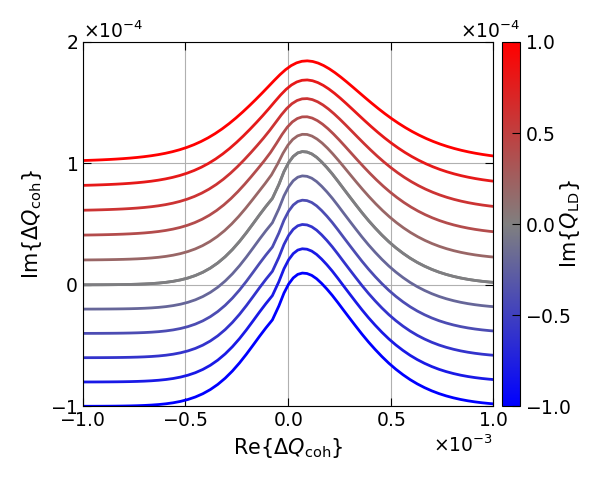

-0.009999999999999998
0.009999999999999998
0.2
0.4
0.6000000000000001
0.8
1.0


In [8]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap

#Make a colormap
basic_cols=['#ff8888', '#333333', '#aaaaff']
basic_cols=['#0000ff', 'gray', '#ff0000']
my_cmap=LinearSegmentedColormap.from_list('mycmap', basic_cols)

# Make a colorbar
c = np.array(growthrates)
norm = mpl.colors.Normalize(vmin=-c.max(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('CMRmap'))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=my_cmap)
cmap.set_array([])





fig=plt.figure(figsize=(figwidth,figheight*1.2))
maxrate = np.max(growthrates)

mode = 3#1: just positive, 2: include -epsilon, 3: Extrapolate

for j, rate in  enumerate(growthrates):
    print(rate/(maxrate))
    if mode!=2 and j==0: continue 
    if mode<3 and j<2:
        plt.annotate(r'$%s\mathrm{i}\epsilon$'%['-','+'][j],xy=(0,-(1-2*j)*8e-5),va='center')
    lw=[1,2][j!=1 or mode<3]
    lw=2
    plt.plot(allDQ[j].real,allDQ[j].imag,c=cmap.to_rgba((rate)),lw=lw)
    
    if mode==3 :
        plt.plot(allDQ[1].real,allDQ[1].imag-rate*(j>1),c=cmap.to_rgba((-rate)),lw=lw)

    
plt.grid(True)
plt.xlim(-10e-4,10e-4)
plt.ylim(-1e-4,2e-4)
plt.yticks()
#plt.legend(loc=2,borderpad=.3,borderaxespad=0,handlelength=1,handletextpad=0)
plt.xlabel(r'$\mathrm{Re}\{\Delta Q_\mathrm{coh}\}$')
plt.ylabel(r'$\mathrm{Im}\{\Delta Q_\mathrm{coh}\}$')
plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=5)
plt.tight_layout()
ax=plt.gca()
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
cb=plt.colorbar(cmap, ticks=np.linspace(-1e-4,1e-4,5),
#             cax=cax,#
                fraction=0.046, pad=0.02
            )
cb.set_label(label=r'$\mathrm{Im}\{Q_\mathrm{LD}\}$', labelpad=-10)

fig.tight_layout()
fig.savefig('Plots/FindDampingrate_%d.eps'%(mode))
fig.savefig('Plots/FindDampingrate_%d.pdf'%(mode))

# Less noise of multiple measurements

In [44]:
print(mpl.rcParams['axes.prop_cycle'])

cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])


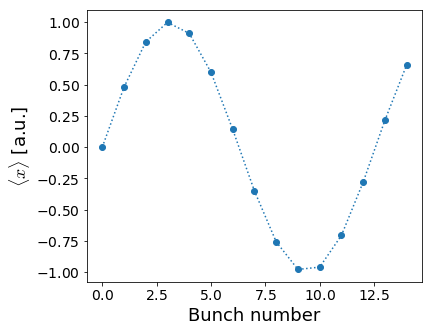

In [46]:
N = 15
x = np.arange(N)

err = np.random.randn(N)*0.1
plt.figure()
plt.plot(x,np.sin(x/2),'o:')
#plt.plot(x,.4*np.cos(x*np.pi),'o:')
plt.xlabel('Bunch number')
plt.ylabel(r'$\langle x \rangle$ [a.u.]')

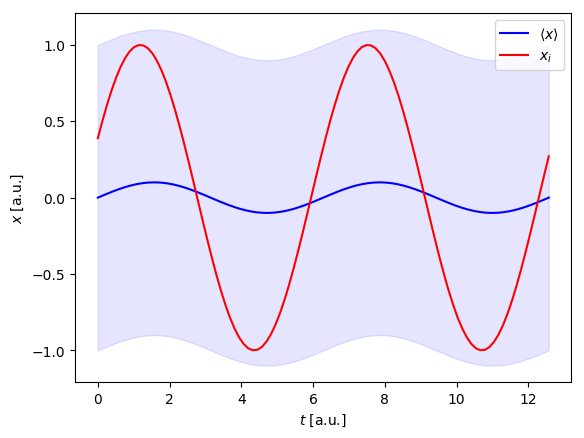

In [34]:
tmax = 2*pi2
NT = 100

t = np.linspace(0,tmax,NT)
xc = 0.1*np.sin(t)
x = 1*np.sin(.4+t*.99)

plt.figure()
plt.fill_between(t,xc-1,xc+1,color='b',alpha=0.1)
plt.plot(t,xc,'b',label=r'$\langle x \rangle$')
plt.plot(t,x,'r',label=r'$x_i$')
plt.legend(loc=0)
plt.xlabel(r'$t$ [a.u.]')
plt.ylabel(r'$x$ [a.u.]')

# Decoherence

(1000, 10)


<IPython.core.display.Javascript object>


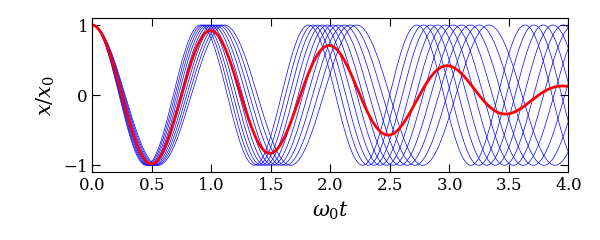

In [19]:
x0 = 1
Q0 = 1
dQ = np.linspace(-1,1,10)*0.1
T = np.linspace(0,4,1000)
xs = np.cos(pi2*(np.outer(T,Q0+dQ)))

print(np.shape(xs))
plt.figure(figsize=(figwidthM,0.6*figheight))
plt.plot(T,xs,'b',lw=0.5)
plt.plot(T,np.mean(xs,axis=1),'r',lw=2,label=r'$\langle x \rangle$')
# plt.legend(loc=0)
plt.xlim(0,4)
plt.xlabel(r'$\omega_0t$')
plt.ylabel(r'$x/x_0$')
plt.tight_layout()
plt.savefig('Plots/decoherence.eps')

<IPython.core.display.Javascript object>


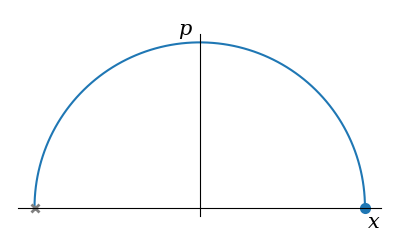

<IPython.core.display.Javascript object>


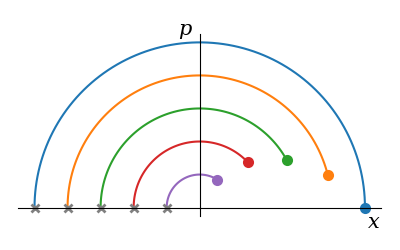

In [58]:
pi=np.pi
uni1 = np.linspace(0,1,100)
Qx=.3


fig1 = plt.figure(figsize=(4,2.5))
fig2 = plt.figure(figsize=(4,2.5))
for  i in range(5):
    r0 = 1 + 0*uni1 - i*.2
    phi0 = pi-(Qx+r0[0]*2e-1)*pi2*uni1
    x=r0*np.cos(phi0)
    p=r0*np.sin(phi0)

    if i ==0:
        ax = fig1.gca()     
        ax.plot(x,p,c='C%d'%i)
        ax.plot(x[-1],p[-1],'o',c='C%d'%i)
        ax.plot(x[0],p[0],'x',c='gray')
    ax = fig2.gca()
    ax.plot(x,p)
    ax.plot(x[-1],p[-1],'o',c='C%d'%i)
    ax.plot(x[0],p[0],'x',c='gray')

# Fix plot
for ifig, fig in enumerate([fig1,fig2]):
    ax=fig.gca()
    ax.set_aspect('equal')
    ax.spines['left'].set_position(('data', 0))
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.yaxis.set_ticks_position('left')
    ax.set_xlabel('$x$',position=[.98,0])
    ax.set_ylabel('$p$',position=[-2,0.96],rotation=0,labelpad=10)
    fig.tight_layout()
    fig.savefig('Plots/tune_%s.eps'%['1p','5p'][ifig])
    

# Decoherence vs feedback

In [59]:


def rotate(x,p,mu):
    temp = x
    x = np.cos(mu)*x   +np.sin(mu)*p
    p =-np.sin(mu)*temp+np.cos(mu)*p
    return x,p

def damper(x,p,g):
    p-=g*np.mean(p)
    return x,p

In [60]:
N = int(1e5)
dp=1
Qx=0.31
ax=5e-3
T=100
g=0.1

x0 = np.random.randn(N)
p0 = np.random.randn(N) + dp

# Only rotation
x = x0.copy()
p = p0.copy()
mu = pi2*Qx
for t in range(T):
    x,p = rotate(x,p,mu)
x1 = x.copy()
p1 = p.copy()

# Decoherence
x = x0.copy()
p = p0.copy()
for t in range(T):
    mu = pi2*(Qx + 0.5*(x**2+p**2)*ax)
    x,p = rotate(x,p,mu)
x2 = x.copy()
p2 = p.copy()
    
# Damper
x = x0.copy()
p = p0.copy()
mu = pi2*Qx
for t in range(T):
    x,p = rotate(x,p,mu)
    x,p = damper(x,p,g)
x3 = x.copy()
p3 = p.copy()
    
# Damper and decoherence
x = x0.copy()
p = p0.copy()
for t in range(T):
    mu = pi2*(Qx + 0.5*(x**2+p**2)*ax)
    x,p = rotate(x,p,mu)
    x,p = damper(x,p,g)
x4 = x.copy()
p4 = p.copy()


<IPython.core.display.Javascript object>


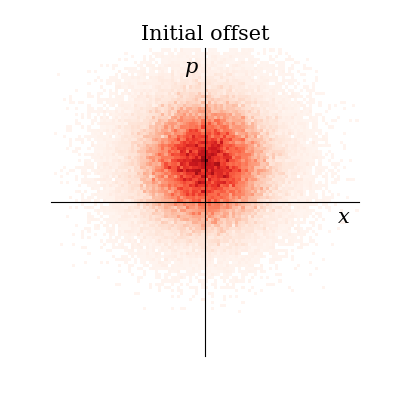

<IPython.core.display.Javascript object>


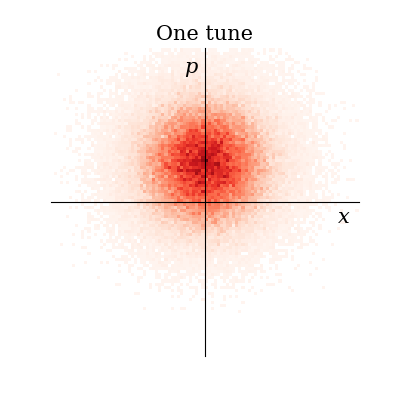

<IPython.core.display.Javascript object>


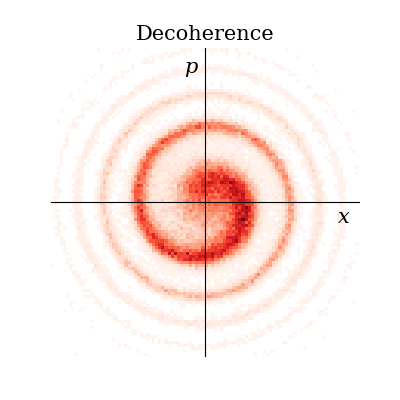

<IPython.core.display.Javascript object>


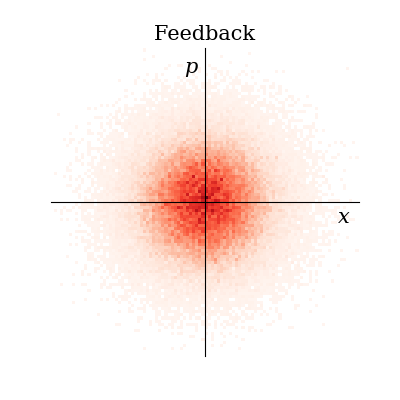

<IPython.core.display.Javascript object>


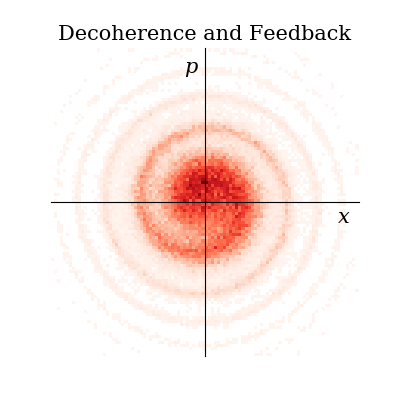

In [69]:
nbin=100
xmax=4

figsize=(4,4)

cmap =mpl.cm.get_cmap('Reds')
cmap.set_under('white')
vmin=1e-9

fig0 = plt.figure(figsize=figsize)#,aspect='equal')
plt.hist2d(x0,p0,bins=nbin,range=[[-xmax,xmax],[-xmax,xmax]],cmap=cmap,vmin=vmin);
plt.title('Initial offset')

fig1 = plt.figure(figsize=figsize)
plt.hist2d(x1,p1,bins=nbin,range=[[-xmax,xmax],[-xmax,xmax]],cmap=cmap,vmin=vmin);
plt.title('One tune')

fig2 = plt.figure(figsize=figsize)
plt.hist2d(x2,p2,bins=nbin,range=[[-xmax,xmax],[-xmax,xmax]],cmap=cmap,vmin=vmin);
plt.title('Decoherence')

fig3 = plt.figure(figsize=figsize)
plt.hist2d(x3,p3,bins=nbin,range=[[-xmax,xmax],[-xmax,xmax]],cmap=cmap,vmin=vmin);
plt.title('Feedback')

fig4 = plt.figure(figsize=figsize)
plt.hist2d(x4,p4,bins=nbin,range=[[-xmax,xmax],[-xmax,xmax]],cmap=cmap,vmin=vmin);
plt.title('Decoherence and Feedback')

for ifig,fig in enumerate([fig0,fig1,fig2,fig3,fig4]):
    ax=fig.gca()
    ax.set_aspect('equal')
    ax.spines['left'].set_position(('data', 0))
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.yaxis.set_ticks_position('left')
    ax.set_xlabel('$x$',position=[.95,0])
    ax.set_ylabel('$p$',position=[-2,0.9],rotation=0,labelpad=10)
    fig.savefig('Plots/dedt_suppression_%d.eps'%ifig)
    

# Candidacy exam

[  2.40482556   5.52007811   8.65372791  11.79153444  14.93091771
  18.07106397  21.21163663  24.35247153  27.49347913  30.63460647]


([<matplotlib.axis.YTick at 0x7f394a0dc9e8>],
 <a list of 1 Text yticklabel objects>)

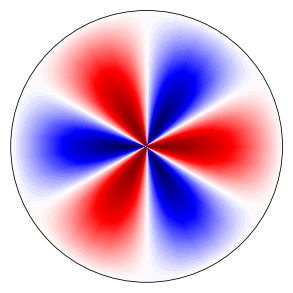

In [24]:
import scipy.special as spec

nulls=spec.jn_zeros(0,10)
print(nulls)
Nr=40
Na=40
r = np.linspace(0,1,Nr)
phi = np.linspace(0,2*np.pi,Na)
# plt.plot(r,spec.jv(0,r*nulls[mr]))



R,PHI = np.meshgrid(r,phi)
mr = 0
ma = 3

F = spec.jv(0,R*nulls[mr]) * np.cos(PHI*ma)

fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.contourf(PHI, R, F,100,cmap='seismic',vmin=-1,vmax=1)
plt.xticks([0,np.pi/2],['x','p'])
plt.xticks([],[])
plt.yticks([0],[''])
# plt.axvline(linewidth=0.5, color = 'k')
# plt.axhline(linewidth=0.5, color = 'k')


# plt.polar(R,)

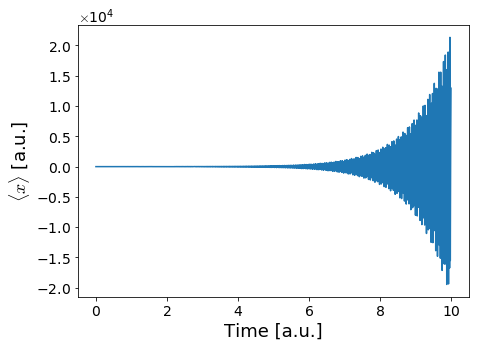

In [26]:
t = np.linspace(0,10,1000)
T=1
y = np.sin(2*np.pi*61.31*t)*np.exp(t/T)
plt.figure(figsize=(7,5))
plt.plot(t,y)
plt.ylabel(r'$\langle x\rangle$ [a.u.]')
plt.xlabel('Time [a.u.]')

In [35]:
xedges_center(np.arange(4))

NameError: name 'edges_center' is not defined